In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datos_1_T=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="Toma 1")
datos_2_T=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="Toma 2")
datos_3_T=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="Toma 3")
datos_T_209=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="209")
datos_T_223=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="223")
datos_T_198=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="198")
datos_V_2=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="210 V 2")
datos_V_12=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="210 1.2") # T=210
datos_V_15=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="210 1.5")
datos_uh_68=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="221 uH 6.8")  #T=221
datos_uh_58=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="221 uh 5.8")
datos_uh_65=pd.read_excel("Datos Fracnk Hertz.xlsx", sheet_name="221 uh 6.5")

In [ ]:
nombres=["1_T","2_T","3_T","T_198","T_223","T_209","V_2","V_12","V_15","uh_68","uh_58","uh_65"]
datos=[datos_1_T,datos_2_T,datos_3_T,datos_T_198,datos_T_223,datos_T_209,datos_V_2,datos_V_12,datos_V_15,datos_uh_68,datos_uh_58,datos_uh_65]
for i in range(0,len(datos)):
  globals()[f"voltaje_{nombres[i]}"] = datos[i]['Voltage U1'].iloc[1:].dropna().astype(float).to_numpy()
  globals()[f"corriente_{nombres[i]}"] = datos[i]['Corriente IA'].iloc[1:].dropna().astype(float).to_numpy()*1e-6


### Actividad 1

Voltajes y temperatura constante $U_2=1.5$, $U_H=6.3$ $T=210ºC$

In [ ]:
datos_1_voltaje=[voltaje_1_T,voltaje_2_T,voltaje_3_T]
datos_2_corriente=[corriente_1_T,corriente_2_T,corriente_3_T]

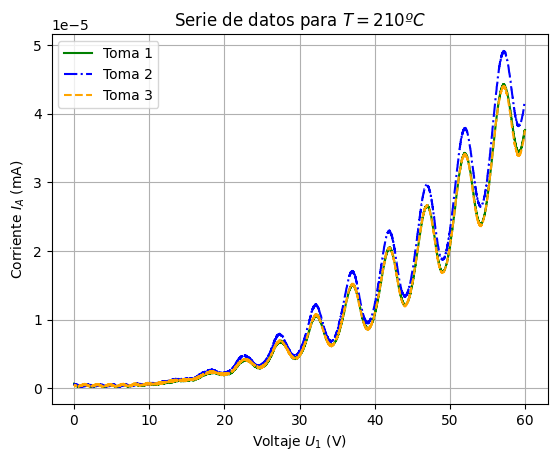

In [ ]:
symbols=["-","-.","--"]
color=["green","blue","orange"]
for i in range(0,3):
  plt.plot(datos_1_voltaje[i],datos_2_corriente[i], ls=symbols[i], label=f"Toma {i+1}",c=color[i])
plt.legend()
plt.title("Serie de datos para $T=210 ºC$")
plt.xlabel("Voltaje $U_1$ (V)")
plt.ylabel("Corriente $I_A$ (mA)")
plt.grid()
plt.savefig("T constante.jpeg")

Voltajes  constante $U_2=1.5$, $U_H=6.3$  temperatura variable $T_=198 ºC$,$T_2=209 ºC$,$T_3=223 ºC$

In [ ]:
voltaje_Ts=[voltaje_T_198,voltaje_T_209,voltaje_T_223]
corriente_Ts=[corriente_T_198,corriente_T_209,corriente_T_223]

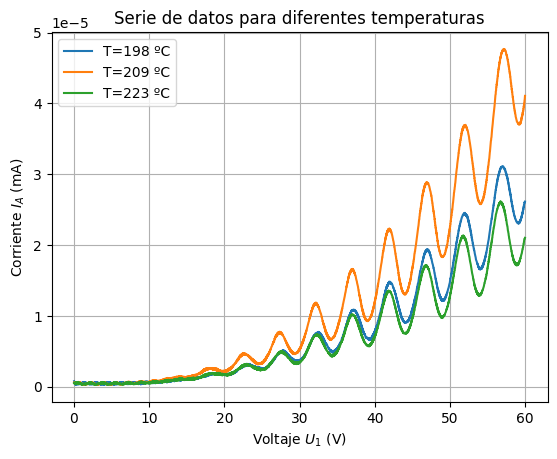

In [ ]:
T=["198 ºC","209 ºC","223 ºC" ]
for i in range(0,3):
  plt.plot(voltaje_Ts[i], corriente_Ts[i], label=f"T={T[i]}",ls="-")
plt.legend()
plt.title("Serie de datos para diferentes temperaturas")
plt.xlabel("Voltaje $U_1$ (V)")
plt.ylabel("Corriente $I_A$ (mA)")
plt.grid()
plt.savefig("Temperaturas variables")

In [ ]:
def obtener_min(df):

  minimos=df[df["tipo"]=="mínimo"]

  corriente_min=minimos["IA[nA]"].astype(float).to_numpy()*1e-6
  voltaje_min=minimos["U1[V]"].astype(float).to_numpy()

  delta_u=[voltaje_min[i+1]-voltaje_min[i] for i in range(0, voltaje_min.shape[0]-1)]

  return [delta_u,voltaje_min,corriente_min]

In [ ]:
delta_T_198=obtener_min(datos_T_198)
delta_T_198=[i[2:] for i in delta_T_198]
delta_T_209=obtener_min(datos_T_209)
delta_T_223=obtener_min(datos_T_223)
delta=[delta_T_198[0],delta_T_209[0],delta_T_223[0]]

In [ ]:
def crear_tabla_por_T(data):
  corriente, voltaje=data[2], data[1]
  sigma_v=np.std(voltaje)
  sigma_c=np.std(corriente)
  num=np.arange(1,len(corriente)+1,1)
  df={"Mínimo":num,f"Corriente $I_A \pm {sigma_c:.2e}$ (mA)":corriente, f"Voltaje $U1 \pm {sigma_v:.2f}(V)$": voltaje}
  df=pd.DataFrame(df)
  latex_code = df.to_latex(index=False, escape=False)
  return latex_code

In [ ]:
latex_code_198=crear_tabla_por_T(delta_T_198)
latex_code_209=crear_tabla_por_T(delta_T_209)
latex_code_223=crear_tabla_por_T(delta_T_223)
print(latex_code_198)

\begin{tabular}{rrr}
\toprule
Mínimo & Corriente $I_A \pm 6.68e-06$ (mA) & Voltaje $U1 \pm 11.17(V)$ \\
\midrule
1 & 0.000002 & 25.000000 \\
2 & 0.000003 & 29.670000 \\
3 & 0.000005 & 34.480000 \\
4 & 0.000007 & 39.340000 \\
5 & 0.000009 & 43.980000 \\
6 & 0.000012 & 49.130000 \\
7 & 0.000017 & 54.040000 \\
8 & 0.000023 & 59.140000 \\
\bottomrule
\end{tabular}



In [ ]:
sigmas=[np.std(i) for i in delta]
def crear_tabla(delta):
  T=[180,209,223]


  numero=[f"{i+1}-{i+2}" for i in range(0,len(delta[0]))]
  df={"Número":numero}


  for i in range(0,len(delta)):


    df[f"$\deltaU \pm {sigmas[i]:.2f} (V)$ T={T[i]}ºC"]=np.round(delta[i],2)

  return df


In [ ]:
df=crear_tabla(delta)
df=pd.DataFrame(df)

In [ ]:
latex_code = df.to_latex(index=False, escape=False)
print(latex_code)

\begin{tabular}{lrrr}
\toprule
Número & $\deltaU \pm 0.18 (V)$ T=180ºC & $\deltaU \pm 0.11 (V)$ T=209ºC & $\deltaU \pm 0.09 (V)$ T=223ºC \\
\midrule
1-2 & 4.670000 & 4.910000 & 4.810000 \\
2-3 & 4.810000 & 4.760000 & 4.810000 \\
3-4 & 4.860000 & 4.910000 & 4.860000 \\
4-5 & 4.640000 & 4.910000 & 4.910000 \\
5-6 & 5.150000 & 5.000000 & 4.740000 \\
6-7 & 4.910000 & 5.130000 & 4.910000 \\
7-8 & 5.100000 & 5.050000 & 5.050000 \\
\bottomrule
\end{tabular}



Temperatura constante $U_H=6.3$ $T=210ºC$, voltaje $U_2$ variables

---



In [ ]:
corrientes=[corriente_V_2, corriente_V_15,corriente_V_12]
voltajes=[voltaje_V_2,voltaje_V_15,voltaje_V_12]

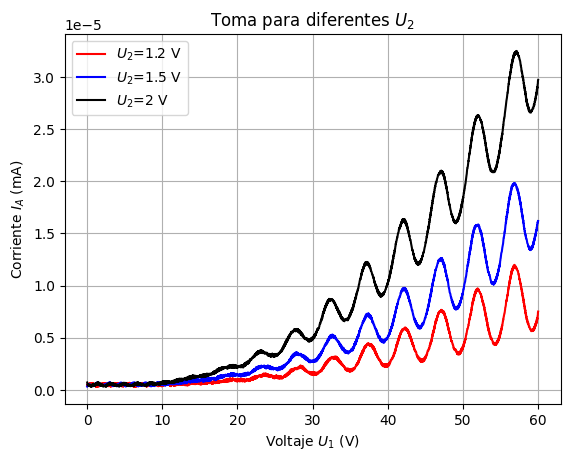

In [ ]:
u2=[1.2,1.5,2]
color=["r","b","k"]
for i in range(0,3):
  plt.plot(voltajes[i], corrientes[i], label=f"$U_2$={u2[i]} V", c=color[i],ls="-")

plt.legend()
plt.xlabel("Voltaje $U_1$ (V)")
plt.ylabel("Corriente $I_A$ (mA)")
plt.title("Toma para diferentes $U_2$")
plt.grid()
plt.savefig("Voltaje U2 variables")

Temperatura constante $U_H=1.5$ $T=221ºC$, voltaje $U_H$ variables

In [ ]:
corriente_uh=[corriente_uh_58,corriente_uh_65, corriente_uh_68]
voltaje_uh=[voltaje_uh_58,voltaje_uh_65,voltaje_uh_68]

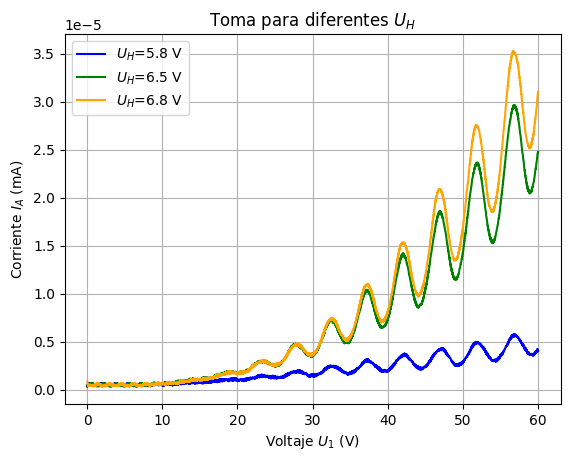

In [ ]:
uh=[5.8,6.5,6.8]
color=["b","green","orange"]
for i in range(0,3):
  plt.plot(voltaje_uh[i], corriente_uh[i], label=f"$U_H$={uh[i]} V",c=color[i],ls="-")
plt.legend()
plt.xlabel("Voltaje $U_1$ (V)")
plt.ylabel("Corriente $I_A$ (mA)")
plt.title("Toma para diferentes $U_H$")
plt.grid()
plt.savefig("v_uh.jpeg")

Distancia entre los minimos vs orden del minimo

In [ ]:
from sklearn.metrics import r2_score
def regresion_lineal(delta,T,sigma):
  error=sigma*np.sqrt(2)
  y=delta
  x=np.arange(1,len(delta)+1,1)

  coefficients,cov=np.polyfit(x,y,1,cov=True)
  poly=np.poly1d(coefficients)
  x_trend = np.linspace(min(x), max(x), 100)
  y_trend = poly(x_trend)
  r2=r2_score(y,poly(x))
  residuals=y-poly(x)


  fig, axs = plt.subplots(1, 2,sharex=False,figsize=(12,5))
  fig.suptitle(f'T={T}')

  axs[0].scatter(x,y, label=f"Datos", c="k")
  axs[0].plot(x_trend,y_trend, label="Ajuste", ls="-", c="r")
  axs[0].set_title('Distancia entre mínimos vs orden del mínimo ')
  axs[0].set_ylabel('Distrancia entre mínimos $\Delta$V (eV)')
  axs[0].set_xlabel('Orden del mínimo')
  axs[0].legend(loc=0)
  axs[0].grid()
  axs[0].text(5.5,4.8,f'$R^2$={r2:.2f}',fontsize=13)

  axs[0].legend()

  axs[1].axhline(y=0,color='k',linestyle='--')
  axs[1].scatter(np.arange(1,len(x)+1,1),residuals)
  axs[1].set_title('Residuales')
  plt.tight_layout()
  plt.savefig(f"Ajuste lineal T={T}.jpeg")


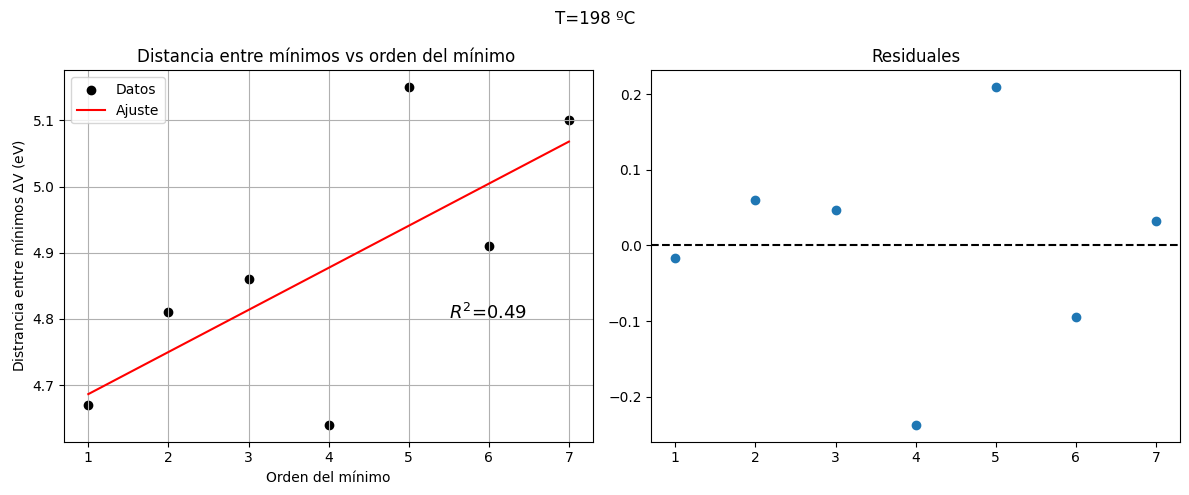

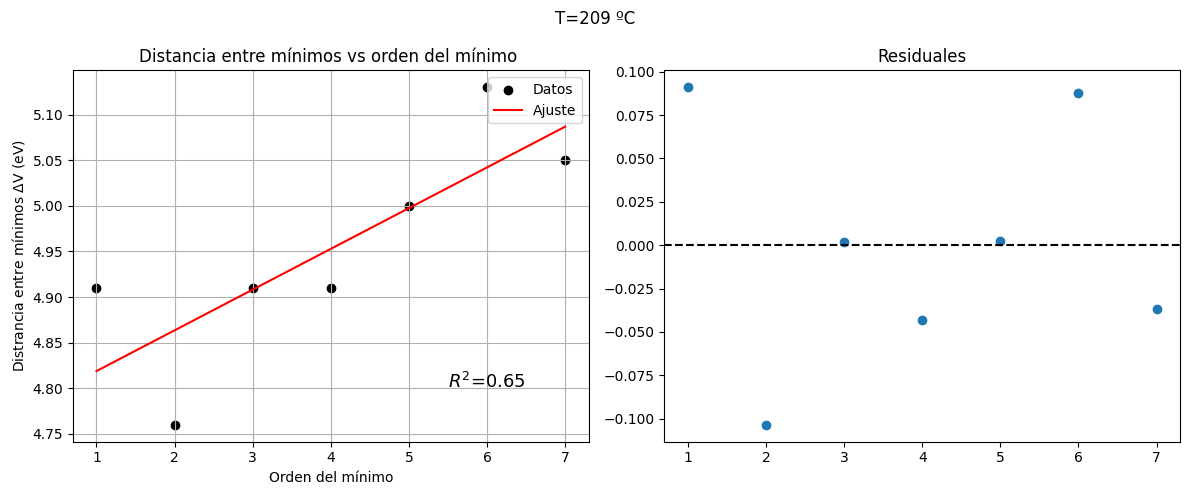

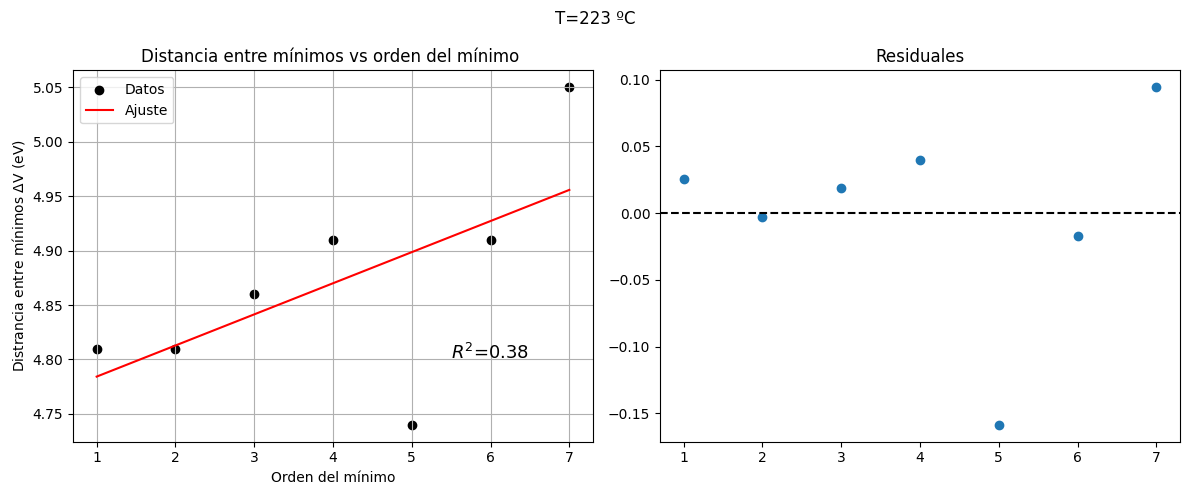

In [ ]:
for i in range(0,3):
  regresion_lineal(delta[i],T[i], sigmas[i])

In [ ]:
t=[]
for i in delta:
  for j in i:
    t.append(abs(4.67-j)/4.67)
t

[3.803761968737153e-16,
 0.029978586723767717,
 0.040685224839401846,
 0.006423982869380399,
 0.10278372591006547,
 0.051391862955031405,
 0.09207708779443287,
 0.05139186295503217,
 0.019271948608136635,
 0.051391862955032924,
 0.051391862955031405,
 0.07066381156316918,
 0.09850107066381213,
 0.08137044967880026,
 0.029978586723768477,
 0.029978586723768477,
 0.04068522483940032,
 0.051391862955032924,
 0.014989293361883288,
 0.051391862955032924,
 0.08137044967880026]